In [81]:
import pandas as pd
import nasdaqdatalink as nddl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
# quandl is the older version, the new version is called nasdaqdatalink so we should use this
# so far the syntax are the same except fot he package name change.
# store the api key (just the key in a text file with this name) if using this method
nddl.read_key(filename="nasdaqdatalinkapikey.txt")
# or use nddl.ApiConfig.api_key = api_key

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   -------------------- ------------------- 153.6/294.6 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
# get the indicator table
zindicators = nddl.get_table("ZILLOW/INDICATORS")
zindicators

,indicator_id,indicator,category
None,,,
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values
5,Z5BR,ZHVI 5+ Bedroom Time Series ($),Home values
6,Z4BR,ZHVI 4-Bedroom Time Series ($),Home values
7,Z3BR,ZHVI 3-Bedroom Time Series ($),Home values
8,Z2BR,ZHVI 2-Bedroom Time Series ($),Home values


In [27]:
# get the data table by indicator (the whole table is huge), paginate= True will retrieve more than 10K rows, otherwise limit to 10K rows.
sssm_data = nddl.get_table("ZILLOW/DATA", indicator_id='SSSM', paginate=True)
sssm_data

InvalidRequestError: (Status 422) (Nasdaq Data Link Error QESx08) You cannot use start_date column as a filter.

In [3]:
# save pd to csv file for use next time without calling API again
# need to create data folder first
sssm_data.to_csv('./data/sssm_full.csv')

NameError: name 'sssm_data' is not defined

In [39]:
# For-Sale Inventory (Smooth, SFR only, Monthly) ISSM
issm = nddl.get_table("ZILLOW/DATA", indicator_id='ISSM', paginate=True)
issm

,indicator_id,region_id,date,value
None,,,,
0,ISSM,845172,2023-08-31,143.0
1,ISSM,845172,2023-07-31,132.0
2,ISSM,845172,2023-06-30,123.0
3,ISSM,845172,2023-05-31,112.0
4,ISSM,845172,2023-04-30,101.0
...,...,...,...,...
60986,ISSM,102001,2018-02-28,1269727.0
60987,ISSM,102001,2018-01-31,1330723.0
60988,ISSM,102001,2017-12-31,1365095.0


In [40]:
issm.to_csv('./data/issm.csv')

In [32]:
issm[issm['date'] > '2022-12-31']

,indicator_id,region_id,date,value
None,,,,
0,ISSM,845172,2023-08-31,143.0
1,ISSM,845172,2023-07-31,132.0
2,ISSM,845172,2023-06-30,123.0
3,ISSM,845172,2023-05-31,112.0
4,ISSM,845172,2023-04-30,101.0
...,...,...,...,...
9937,ISSM,395149,2023-02-28,170.0
9938,ISSM,395149,2023-01-31,179.0
9997,ISSM,395148,2023-08-31,9608.0


In [38]:
data = nddl.get_table('ZILLOW/DATA', paginate=True, date={'gte': '2015-01-01'}, qopts={'columns':['date', 'value','region_id', 'indicator_id']})
data

InvalidRequestError: (Status 422) (Nasdaq Data Link Error QESx08) You cannot use date column as a filter.

In [36]:
data.dtypes

ticker                  object
per_end_date    datetime64[ns]
dtype: object

In [35]:
zacks = nddl.get_table('ZACKS/FC', paginate=True, ticker=['AAPL', 'MSFT'])
zacks

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,...,stock_based_compsn_qd,cash_flow_oper_activity_qd,net_change_prop_plant_equip_qd,comm_stock_div_paid_qd,pref_stock_div_paid_qd,tot_comm_pref_stock_div_qd,wavg_shares_out,wavg_shares_out_diluted,eps_basic_net,eps_diluted_net
None,,,,,,,,,,,,,,,,,,,,,
0,MSFT,MSFT,Microsoft,Microsoft Corporation,NASDAQ,USD,2018-12-31,Q,None,2019,...,1183.0,8900.0,-3707.0,-3544.0,None,-3544.0,7692.00,7768.00,1.0900,1.0800
1,MSFT,MSFT,Microsoft,Microsoft Corporation,NASDAQ,USD,2018-09-30,Q,None,2019,...,1107.0,13657.0,-3602.0,-3220.0,None,-3220.0,7673.00,7766.00,1.1500,1.1400
2,MSFT,MSFT,Microsoft,Microsoft Corporation,NASDAQ,USD,2018-06-30,Q,None,2018,...,1012.0,11418.0,-3980.0,-3226.0,None,-3226.0,7700.00,7794.00,1.1600,1.1600
3,MSFT,MSFT,Microsoft,Microsoft Corporation,NASDAQ,USD,2018-03-31,Q,None,2018,...,969.0,12151.0,-2934.0,-3232.0,None,-3232.0,7698.00,7794.00,0.9600,0.9500
4,MSFT,MSFT,Microsoft,Microsoft Corporation,NASDAQ,USD,2018-06-30,A,None,2018,...,NaN,NaN,NaN,NaN,None,NaN,7700.00,7794.00,2.1500,2.1300
5,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,2018-12-31,Q,None,2019,...,1559.0,26690.0,-3355.0,-3568.0,None,-3568.0,18943.28,19093.01,1.0550,1.0450
6,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,2018-09-30,Q,None,2018,...,1345.0,19523.0,-3041.0,-3530.0,None,-3530.0,19821.51,20000.44,0.7425,0.7400
7,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,2018-06-30,Q,None,2018,...,1351.0,14488.0,-3267.0,-3653.0,None,-3653.0,19528.67,19706.44,0.5900,0.5850
8,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,2018-03-31,Q,None,2018,...,1348.0,15130.0,-4195.0,-3190.0,None,-3190.0,20099.51,20273.97,0.6875,0.6825


In [9]:
import matplotlib.pyplot as plt

In [10]:
# read from csv file instead of using API
sssm_data = pd.read_csv('./data/sssm_full.csv', parse_dates= ['date'])

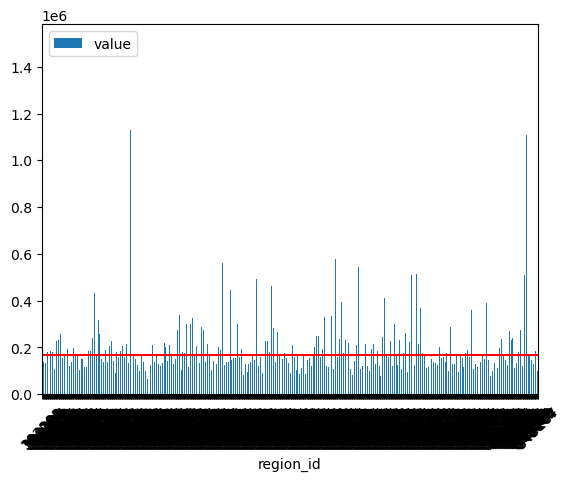

In [11]:
# plotting median house price by regions with the national median as a red reference line
sssm_region_gby_region = sssm_data.groupby('region_id').agg({'value': 'median'})
sssm_region_gby_region.plot(kind='bar', rot=45)
# plt.xlabel("")
plt.hlines(sssm_region_gby_region.median(),0, 1000, color='r')

In [15]:
# drop the first col (index number)
sssm_data = sssm_data.drop(sssm_data.columns[0], axis=1)

In [16]:
sssm_data.head()

,indicator_id,region_id,date,value
0,SSSM,845167,2023-07-31,134000.0
1,SSSM,845167,2023-06-30,140167.0
2,SSSM,845167,2023-05-31,138000.0
3,SSSM,845167,2023-04-30,136333.0
4,SSSM,845167,2023-03-31,132167.0


In [17]:
len(sssm_data)

90705

In [18]:
sssm_data.describe()

,region_id,value
count,90705.000000,9.070500e+04
mean,413056.792933,2.011364e+05
std,83568.547843,1.252806e+05
min,102001.000000,2.050000e+04
25%,394546.000000,1.281670e+05
50%,394802.000000,1.654000e+05
75%,395055.000000,2.296330e+05
max,845167.000000,1.680000e+06


In [19]:
sssm_data['date'].min()

'2008-02-29'

In [20]:
sssm_data['date'].max()

'2023-07-31'

In [24]:
# get all the regions table
zregions = nddl.get_table("ZILLOW/REGIONS", paginate=True)
zregions

,region_id,region_type,region
None,,,
0,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County"
1,99998,zip,98846;WA;nan;Pateros;Okanogan County
2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades
3,99996,zip,98844;WA;nan;Oroville;Okanogan County
4,99995,zip,"98843;WA;Wenatchee, WA;Orondo;Douglas County"
...,...,...,...
89300,100000,zip,"98848;WA;Moses Lake, WA;Quincy;Grant County"
89301,10000,city,Bloomington;MD;nan;Garrett County
89302,1000,county,"Echols County;GA;Valdosta, GA"


In [25]:
# save to csv
zregions.to_csv('./data/zillow_region.csv')

In [41]:
zregions[zregions['region_id'] == 845167]


,region_id,region_type,region
None,,,
12253,845167,metro,"Ottawa, IL"


In [36]:
zregions['region_id'] = zregions['region_id'].astype('int64')

In [37]:
zregions.dtypes

region_id       int64
region_type    object
region         object
dtype: object

In [38]:
sssm_combine = pd.merge(sssm_data, zregions)
sssm_combine

,indicator_id,region_id,date,value,region_type,region
0,SSSM,845167,2023-07-31,134000.0,metro,"Ottawa, IL"
1,SSSM,845167,2023-06-30,140167.0,metro,"Ottawa, IL"
2,SSSM,845167,2023-05-31,138000.0,metro,"Ottawa, IL"
3,SSSM,845167,2023-04-30,136333.0,metro,"Ottawa, IL"
4,SSSM,845167,2023-03-31,132167.0,metro,"Ottawa, IL"
...,...,...,...,...,...,...
90700,SSSM,102001,2008-06-30,186694.0,metro,United States
90701,SSSM,102001,2008-05-31,183360.0,metro,United States
90702,SSSM,102001,2008-04-30,180194.0,metro,United States
90703,SSSM,102001,2008-03-31,189750.0,metro,United States


In [43]:
sssm_combine.groupby('region').count()

,indicator_id,region_id,date,value,region_type
region,,,,,
"Aberdeen, WA",6,6,6,6,6
"Abilene, TX",184,184,184,184,184
"Ada, OK",77,77,77,77,77
"Adrian, MI",173,173,173,173,173
"Akron, OH",186,186,186,186,186
...,...,...,...,...,...
"York, PA",184,184,184,184,184
"Youngstown, OH",184,184,184,184,184
"Yuba City, CA",186,186,186,186,186


In [44]:
sssm_combine.groupby('region_type').count()

,indicator_id,region_id,date,value,region
region_type,,,,,
metro,90705,90705,90705,90705,90705


In [60]:
sssm_combine[['City', 'State']]= sssm_combine['region'].str.split(', ', expand=True)
# sssm_combine['State'] = sssm_combine['State'].str.strip()
sssm_combine

,indicator_id,region_id,date,value,region_type,region,City,State
0,SSSM,845167,2023-07-31,134000.0,metro,"Ottawa, IL",Ottawa,IL
1,SSSM,845167,2023-06-30,140167.0,metro,"Ottawa, IL",Ottawa,IL
2,SSSM,845167,2023-05-31,138000.0,metro,"Ottawa, IL",Ottawa,IL
3,SSSM,845167,2023-04-30,136333.0,metro,"Ottawa, IL",Ottawa,IL
4,SSSM,845167,2023-03-31,132167.0,metro,"Ottawa, IL",Ottawa,IL
...,...,...,...,...,...,...,...,...
90700,SSSM,102001,2008-06-30,186694.0,metro,United States,United States,None
90701,SSSM,102001,2008-05-31,183360.0,metro,United States,United States,None
90702,SSSM,102001,2008-04-30,180194.0,metro,United States,United States,None
90703,SSSM,102001,2008-03-31,189750.0,metro,United States,United States,None


In [76]:
# replace (probably input error) "NC; NC" with "NC"
sssm_combine['State'] = sssm_combine['State'].str.replace("NC; NC", "NC")

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7632\1802012052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sssm_combine['State'] = sssm_combine['State'].str.replace("NC; NC", "NC")


In [77]:
sssm_combine.State.unique()

array(['IL', 'NH', 'TX', 'IN', 'AZ', 'NY', 'OH', 'IA', 'MN', 'TN', 'WI',
       'OK', 'HI', 'OR', 'CO', 'CA', 'NC', 'AL', 'KS', 'FL', 'AR', 'MI',
       'GA', 'MD', 'VA', 'KY', 'PA', 'WA', 'MA', 'WV', 'MO', 'DC', 'NJ',
       'UT', 'ID', 'CT', 'NM', 'SC', 'SD', 'LA', 'WY', 'NV', 'RI', 'ME',
       'NE', 'MT', 'MS', 'ND', 'DE', 'AK'], dtype=object)

In [63]:
sssm_combine[sssm_combine['State'].isin([None, 'NC; NC'])]


,indicator_id,region_id,date,value,region_type,region,City,State
67890,SSSM,394546,2020-08-31,217733.0,metro,"Dunn, NC; NC",Dunn,NC; NC
67891,SSSM,394546,2020-07-31,212750.0,metro,"Dunn, NC; NC",Dunn,NC; NC
67892,SSSM,394546,2020-06-30,210333.0,metro,"Dunn, NC; NC",Dunn,NC; NC
67893,SSSM,394546,2020-05-31,206417.0,metro,"Dunn, NC; NC",Dunn,NC; NC
67894,SSSM,394546,2020-04-30,202083.0,metro,"Dunn, NC; NC",Dunn,NC; NC
...,...,...,...,...,...,...,...,...
90700,SSSM,102001,2008-06-30,186694.0,metro,United States,United States,None
90701,SSSM,102001,2008-05-31,183360.0,metro,United States,United States,None
90702,SSSM,102001,2008-04-30,180194.0,metro,United States,United States,None
90703,SSSM,102001,2008-03-31,189750.0,metro,United States,United States,None


,indicator_id,region_id,date,value,region_type,region,City,State
0,SSSM,845167,2023-07-31,134000.0,metro,"Ottawa, IL",Ottawa,IL
1,SSSM,845167,2023-06-30,140167.0,metro,"Ottawa, IL",Ottawa,IL
2,SSSM,845167,2023-05-31,138000.0,metro,"Ottawa, IL",Ottawa,IL
3,SSSM,845167,2023-04-30,136333.0,metro,"Ottawa, IL",Ottawa,IL
4,SSSM,845167,2023-03-31,132167.0,metro,"Ottawa, IL",Ottawa,IL
...,...,...,...,...,...,...,...,...
90514,SSSM,394298,2023-02-28,289833.0,metro,"Aberdeen, WA",Aberdeen,WA
90515,SSSM,394298,2023-01-31,293500.0,metro,"Aberdeen, WA",Aberdeen,WA
90516,SSSM,394298,2022-09-30,312000.0,metro,"Aberdeen, WA",Aberdeen,WA
90517,SSSM,394298,2022-08-31,326833.0,metro,"Aberdeen, WA",Aberdeen,WA


In [71]:
sssm_combine.describe(include='all')

,indicator_id,region_id,date,value,region_type,region,City,State
count,90519,90519.000000,90519,9.051900e+04,90519,90519,90519,90519
unique,1,NaN,186,NaN,1,727,649,51
top,SSSM,NaN,2022-07-31,NaN,metro,"Dayton, OH",Springfield,CA
freq,90519,NaN,698,NaN,90519,357,728,5658
mean,NaN,413695.955733,NaN,2.010901e+05,NaN,NaN,NaN,NaN
std,NaN,82454.997162,NaN,1.253769e+05,NaN,NaN,NaN,NaN
min,NaN,394298.000000,NaN,2.050000e+04,NaN,NaN,NaN,NaN
25%,NaN,394547.000000,NaN,1.281325e+05,NaN,NaN,NaN,NaN
50%,NaN,394803.000000,NaN,1.652360e+05,NaN,NaN,NaN,NaN
75%,NaN,395056.000000,NaN,2.295380e+05,NaN,NaN,NaN,NaN


In [72]:
sssm_combine[sssm_combine['City'] == 'Springfield']

,indicator_id,region_id,date,value,region_type,region,City,State
16462,SSSM,395117,2023-07-31,163300.0,metro,"Springfield, OH",Springfield,OH
16463,SSSM,395117,2023-06-30,159967.0,metro,"Springfield, OH",Springfield,OH
16464,SSSM,395117,2023-05-31,157967.0,metro,"Springfield, OH",Springfield,OH
16465,SSSM,395117,2023-04-30,160350.0,metro,"Springfield, OH",Springfield,OH
16466,SSSM,395117,2023-03-31,150350.0,metro,"Springfield, OH",Springfield,OH
...,...,...,...,...,...,...,...,...
17185,SSSM,395114,2008-08-31,113333.0,metro,"Springfield, IL",Springfield,IL
17186,SSSM,395114,2008-07-31,113917.0,metro,"Springfield, IL",Springfield,IL
17187,SSSM,395114,2008-06-30,111250.0,metro,"Springfield, IL",Springfield,IL
17188,SSSM,395114,2008-05-31,110917.0,metro,"Springfield, IL",Springfield,IL


In [74]:
# there are 727 distinct cities in the dataset, 52 states
sssm_combine.groupby('region')['City'].count()

region
Aberdeen, WA        6
Abilene, TX       184
Ada, OK            77
Adrian, MI        173
Akron, OH         186
                 ... 
York, PA          184
Youngstown, OH    184
Yuba City, CA     186
Yuma, AZ          184
Zanesville, OH    149
Name: City, Length: 727, dtype: int64

In [80]:
sssm_combine.groupby('State')['City'].count().sort_values()

State
AK       6
DE     184
RI     186
DC     186
KS     267
SD     312
MS     370
NE     392
WY     456
ND     552
HI     592
NH     722
ME     725
NJ     736
MT     736
ID     744
NM     805
WV     917
MA     926
CT     926
NV    1032
IA    1048
MD    1101
UT    1157
LA    1315
VA    1425
OK    1559
AR    1646
WA    1690
AZ    1713
KY    1783
MN    1827
SC    2029
CO    2087
AL    2159
MO    2328
OR    2606
NY    2700
IL    2997
IN    3166
WI    3381
TN    3520
GA    3819
PA    3826
MI    3963
OH    4043
TX    4180
FL    4452
NC    5569
CA    5658
Name: City, dtype: int64

In [79]:
sssm_combine[sssm_combine['State'] =='AK']

,indicator_id,region_id,date,value,region_type,region,City,State
87888,SSSM,394327,2022-10-31,381467.0,metro,"Anchorage, AK",Anchorage,AK
87889,SSSM,394327,2022-09-30,392300.0,metro,"Anchorage, AK",Anchorage,AK
87890,SSSM,394327,2022-08-31,413667.0,metro,"Anchorage, AK",Anchorage,AK
87891,SSSM,394327,2022-07-31,424000.0,metro,"Anchorage, AK",Anchorage,AK
87892,SSSM,394327,2022-06-30,413367.0,metro,"Anchorage, AK",Anchorage,AK
87893,SSSM,394327,2022-05-31,399333.0,metro,"Anchorage, AK",Anchorage,AK


In [87]:
sssm_combine[sssm_combine['State'] =='CA']['City'].nunique()

34

In [86]:
sssm_combine[sssm_combine['State'] =='CA'].sort_values(by='date').head(20)

,indicator_id,region_id,date,value,region_type,region,City,State
84926,SSSM,394357,2008-02-29,236500.0,metro,"Bakersfield, CA",Bakersfield,CA
32590,SSSM,394952,2008-02-29,525000.0,metro,"Oxnard, CA",Oxnard,CA
23941,SSSM,395045,2008-02-29,343500.0,metro,"Sacramento, CA",Sacramento,CA
14772,SSSM,395134,2008-02-29,330000.0,metro,"Stockton, CA",Stockton,CA
12206,SSSM,395166,2008-02-29,420000.0,metro,"Truckee, CA",Truckee,CA
61696,SSSM,394619,2008-02-29,255000.0,metro,"Fresno, CA",Fresno,CA
22454,SSSM,395057,2008-02-29,618000.0,metro,"San Francisco, CA",San Francisco,CA
22268,SSSM,395059,2008-02-29,755000.0,metro,"San Jose, CA",San Jose,CA
10417,SSSM,395183,2008-02-29,382500.0,metro,"Vallejo, CA",Vallejo,CA
26015,SSSM,395025,2008-02-29,335000.0,metro,"Riverside, CA",Riverside,CA


In [88]:
# put back in the USA rows to save to file
sssm_combine = pd.concat([sssm_combine, usa_sssm_comb], axis=0)
sssm_combine

,indicator_id,region_id,date,value,region_type,region,City,State
0,SSSM,845167,2023-07-31,134000.0,metro,"Ottawa, IL",Ottawa,IL
1,SSSM,845167,2023-06-30,140167.0,metro,"Ottawa, IL",Ottawa,IL
2,SSSM,845167,2023-05-31,138000.0,metro,"Ottawa, IL",Ottawa,IL
3,SSSM,845167,2023-04-30,136333.0,metro,"Ottawa, IL",Ottawa,IL
4,SSSM,845167,2023-03-31,132167.0,metro,"Ottawa, IL",Ottawa,IL
...,...,...,...,...,...,...,...,...
90700,SSSM,102001,2008-06-30,186694.0,metro,United States,United States,None
90701,SSSM,102001,2008-05-31,183360.0,metro,United States,United States,None
90702,SSSM,102001,2008-04-30,180194.0,metro,United States,United States,None
90703,SSSM,102001,2008-03-31,189750.0,metro,United States,United States,None


In [89]:
sssm_combine.to_csv('./data/sssm_combine.csv')

## Findings about sssm_combine  
  - It contains metropolitan area monthly median house price over the years ( in each state as well as the whole of US (region = 'United States'), 90705 rows x 8 columns.  
  - The date range may defer from city to city.   
  - Different states have diff number of metro area (AK, Alaska, only has 1, CA, california, has 34.  
  - The difference between smoothed and raw data on Zillow is that the former removes 'spikes' in the raw data to make the chart look 'smoother', which is fine for our purpose.
### To do:  
  1. -find the city with the longest data period (groupby region, count)    (Dayton, 357 pt)
  2. -plot that city with the national data  
  3. plot the cities in CA.  
  4. get the number of cities in each state.

In [7]:
sssm_combine = pd.read_csv('./data/sssm_combine.csv', parse_dates=['date'])
# drop the first col (index number)
sssm_combine = sssm_combine.drop(sssm_combine.columns[0], axis=1)
sssm_combine

,indicator_id,region_id,date,value,region_type,region,City,State
0,SSSM,845167,2023-07-31,134000.0,metro,"Ottawa, IL",Ottawa,IL
1,SSSM,845167,2023-06-30,140167.0,metro,"Ottawa, IL",Ottawa,IL
2,SSSM,845167,2023-05-31,138000.0,metro,"Ottawa, IL",Ottawa,IL
3,SSSM,845167,2023-04-30,136333.0,metro,"Ottawa, IL",Ottawa,IL
4,SSSM,845167,2023-03-31,132167.0,metro,"Ottawa, IL",Ottawa,IL
...,...,...,...,...,...,...,...,...
90700,SSSM,102001,2008-06-30,186694.0,metro,United States,United States,NaN
90701,SSSM,102001,2008-05-31,183360.0,metro,United States,United States,NaN
90702,SSSM,102001,2008-04-30,180194.0,metro,United States,United States,NaN
90703,SSSM,102001,2008-03-31,189750.0,metro,United States,United States,NaN


In [46]:
issm =pd.read_csv('./data/issm.csv', parse_dates=['date'])
issm= issm.drop(issm.columns[0], axis=1)
issm.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
dtype: object

In [45]:
issm.head()

,indicator_id,region_id,date,value
0,ISSM,845172,2023-08-31,143.0
1,ISSM,845172,2023-07-31,132.0
2,ISSM,845172,2023-06-30,123.0
3,ISSM,845172,2023-05-31,112.0
4,ISSM,845172,2023-04-30,101.0


In [16]:
sssm_combine.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
region_type             object
region                  object
City                    object
State                   object
dtype: object

In [8]:
usa_sssm_comb = sssm_combine[sssm_combine['State'].isnull() ]
usa_sssm_comb

,indicator_id,region_id,date,value,region_type,region,City,State
90519,SSSM,102001,2023-07-31,369384.0,metro,United States,United States,NaN
90520,SSSM,102001,2023-06-30,363051.0,metro,United States,United States,NaN
90521,SSSM,102001,2023-05-31,353333.0,metro,United States,United States,NaN
90522,SSSM,102001,2023-04-30,342167.0,metro,United States,United States,NaN
90523,SSSM,102001,2023-03-31,332833.0,metro,United States,United States,NaN
...,...,...,...,...,...,...,...,...
90700,SSSM,102001,2008-06-30,186694.0,metro,United States,United States,NaN
90701,SSSM,102001,2008-05-31,183360.0,metro,United States,United States,NaN
90702,SSSM,102001,2008-04-30,180194.0,metro,United States,United States,NaN
90703,SSSM,102001,2008-03-31,189750.0,metro,United States,United States,NaN


In [9]:
# remove country-wide stats
sssm_combine = sssm_combine.dropna()
sssm_combine

,indicator_id,region_id,date,value,region_type,region,City,State
0,SSSM,845167,2023-07-31,134000.0,metro,"Ottawa, IL",Ottawa,IL
1,SSSM,845167,2023-06-30,140167.0,metro,"Ottawa, IL",Ottawa,IL
2,SSSM,845167,2023-05-31,138000.0,metro,"Ottawa, IL",Ottawa,IL
3,SSSM,845167,2023-04-30,136333.0,metro,"Ottawa, IL",Ottawa,IL
4,SSSM,845167,2023-03-31,132167.0,metro,"Ottawa, IL",Ottawa,IL
...,...,...,...,...,...,...,...,...
90514,SSSM,394298,2023-02-28,289833.0,metro,"Aberdeen, WA",Aberdeen,WA
90515,SSSM,394298,2023-01-31,293500.0,metro,"Aberdeen, WA",Aberdeen,WA
90516,SSSM,394298,2022-09-30,312000.0,metro,"Aberdeen, WA",Aberdeen,WA
90517,SSSM,394298,2022-08-31,326833.0,metro,"Aberdeen, WA",Aberdeen,WA


In [10]:
sssm_combine.groupby('region')['State'].count().sort_values()

region
Fort Dodge, IA          1
Coeur d'Alene, ID       1
Lewisburg, PA           1
Las Vegas, NM           1
Union City, TN          1
                     ... 
Portland, OR          186
Port St. Lucie, FL    186
Detroit, MI           186
Ocala, FL             186
Dayton, OH            357
Name: State, Length: 727, dtype: int64

In [36]:
dayton = sssm_combine[sssm_combine['region']== 'Dayton, OH']
dayton_39 = dayton[dayton['region_id'] == 394521]
dayton_39.sort_values(by='date').tail()

,indicator_id,region_id,date,value,region_type,region,City,State
69956,SSSM,394521,2022-02-28,180300.0,metro,"Dayton, OH",Dayton,OH
69955,SSSM,394521,2022-03-31,172750.0,metro,"Dayton, OH",Dayton,OH
69954,SSSM,394521,2022-04-30,174000.0,metro,"Dayton, OH",Dayton,OH
69953,SSSM,394521,2022-05-31,187333.0,metro,"Dayton, OH",Dayton,OH
69952,SSSM,394521,2022-06-30,199667.0,metro,"Dayton, OH",Dayton,OH


In [32]:
usa_sssm_comb.tail()

,indicator_id,region_id,date,value,region_type,region,City,State
90523,SSSM,102001,2023-03-31,332833.0,metro,United States,United States,NaN
90522,SSSM,102001,2023-04-30,342167.0,metro,United States,United States,NaN
90521,SSSM,102001,2023-05-31,353333.0,metro,United States,United States,NaN
90520,SSSM,102001,2023-06-30,363051.0,metro,United States,United States,NaN
90519,SSSM,102001,2023-07-31,369384.0,metro,United States,United States,NaN


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15176\1647226878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dayton_39.sort_values(by='date', inplace=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15176\1647226878.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_sssm_comb.sort_values(by='date', inplace=True)


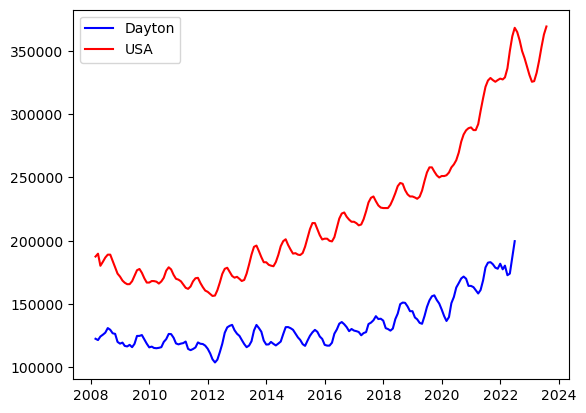

In [31]:
# dayton.plot(kind='line', x='date', y='value', color='b')
# usa_sssm_comb.plot(kind='line',x= 'date', y='value',  color='r')
dayton_39.sort_values(by='date', inplace=True)
usa_sssm_comb.sort_values(by='date', inplace=True)
plt.plot(dayton_39['date'], dayton_39['value'], color='b',label='Dayton')
plt.plot(usa_sssm_comb['date'], usa_sssm_comb['value'], color='r', label='USA')
plt.legend()
plt.show()

In [44]:
us_dayton = pd.merge( dayton_39[['date','value']], usa_sssm_comb[['date', 'value']], on='date',suffixes=['_dayton', '_us'])
us_dayton_corr = us_dayton['value_dayton'].corr(us_dayton['value_us'])
us_dayton_corr


0.9571157551328648

In [42]:
len(usa_sssm_comb[['date', 'value']])

186

In [43]:
len(dayton_39)

173

In [25]:
len(dayton[dayton['region_id'] != 394521])

184

In [26]:
len(dayton[dayton['region_id'] == 394521])

173

In [48]:
# getting the listing for Dayton, OH
dayton_inventory = issm[issm['region_id'] == 394521]
len(dayton_inventory.sort_values(by='date'))

58

,indicator_id,region_id,date,value,region_type,region,City,State
90519,SSSM,102001,2023-07-31,369384.0,metro,United States,United States,NaN
90520,SSSM,102001,2023-06-30,363051.0,metro,United States,United States,NaN
90521,SSSM,102001,2023-05-31,353333.0,metro,United States,United States,NaN
90522,SSSM,102001,2023-04-30,342167.0,metro,United States,United States,NaN
90523,SSSM,102001,2023-03-31,332833.0,metro,United States,United States,NaN
...,...,...,...,...,...,...,...,...
90700,SSSM,102001,2008-06-30,186694.0,metro,United States,United States,NaN
90701,SSSM,102001,2008-05-31,183360.0,metro,United States,United States,NaN
90702,SSSM,102001,2008-04-30,180194.0,metro,United States,United States,NaN
90703,SSSM,102001,2008-03-31,189750.0,metro,United States,United States,NaN


In [51]:
# combining price and listing
dayton_sssm_issm = pd.merge(dayton_39, dayton_inventory, on='date',suffixes=['_price','_listing'])
len(dayton_sssm_issm)

57

In [55]:
# keep only those rows with the same region_id
# dayton_sssm_issm_filter = dayton_sssm_issm[dayton_sssm_issm['region_id_price'] == dayton_sssm_issm['region_id_listing']]
# dayton_sssm_issm_filter
dayton_sssm_issm_sc_df= dayton_sssm_issm[['date','value_price','value_listing']]
dayton_sssm_issm_sc_df.head()

,date,value_price,value_listing
0,2022-06-30,199667.0,1948.0
1,2022-05-31,187333.0,1725.0
2,2022-04-30,174000.0,1481.0
3,2022-03-31,172750.0,1388.0
4,2022-02-28,180300.0,1434.0


In [59]:
# get the linear regression parameters

(slope, intercept, rvalue, pval, stderr) = stats.linregress(dayton_sssm_issm_sc_df['value_listing'],\
                                                            dayton_sssm_issm_sc_df['value_price'])
pval

2.5968071872407742e-08

r squared value is 0.43352


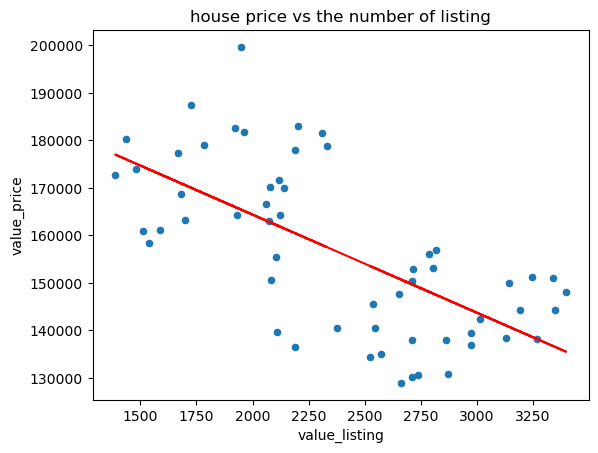

In [60]:
# plot the scatter plot and regression line.
dayton_sssm_issm_sc_df.plot(kind='scatter',x='value_listing', y='value_price', title='house price vs the number of listing')
regr_yval = dayton_sssm_issm_sc_df['value_listing']*slope + intercept
plt.plot(dayton_sssm_issm_sc_df['value_listing'], regr_yval, color='r')
print(f'r squared value is {rvalue**2:.5f}')

From the graph we can we that there is generally a negative correlation between the house price and number of listing. This makes sense from a supply-demand perspective. As the more supply (listing) there is, the lower the price will be given the same demand. The r-squared value is significant, meaning the regression model is reliable.

In [61]:
dayton_covidtime = dayton[(dayton['date'] >= '1-1-2019') & (dayton['date']<='31-12-2023')]
dayton_covidtime

,indicator_id,region_id,date,value,region_type,region,City,State
589,SSSM,845158,2023-07-31,216867.0,metro,"Dayton, OH",Dayton,OH
590,SSSM,845158,2023-06-30,210667.0,metro,"Dayton, OH",Dayton,OH
591,SSSM,845158,2023-05-31,198333.0,metro,"Dayton, OH",Dayton,OH
592,SSSM,845158,2023-04-30,191633.0,metro,"Dayton, OH",Dayton,OH
593,SSSM,845158,2023-03-31,182300.0,metro,"Dayton, OH",Dayton,OH
...,...,...,...,...,...,...,...,...
69989,SSSM,394521,2019-05-31,140550.0,metro,"Dayton, OH",Dayton,OH
69990,SSSM,394521,2019-04-30,134331.0,metro,"Dayton, OH",Dayton,OH
69991,SSSM,394521,2019-03-31,135056.0,metro,"Dayton, OH",Dayton,OH
69992,SSSM,394521,2019-02-28,137881.0,metro,"Dayton, OH",Dayton,OH


In [112]:
# creating a new column to identify if the date is before or during covid
dayton_covidtime = dayton_covidtime[dayton_covidtime['region_id'] ==394521]
dayton_covidtime['covid']='during'
dayton_covidtime.head()

,indicator_id,region_id,date,value,region_type,region,City,State,covid
69993,SSSM,394521,2019-01-31,139319.0,metro,"Dayton, OH",Dayton,OH,during
69992,SSSM,394521,2019-02-28,137881.0,metro,"Dayton, OH",Dayton,OH,during
69991,SSSM,394521,2019-03-31,135056.0,metro,"Dayton, OH",Dayton,OH,during
69990,SSSM,394521,2019-04-30,134331.0,metro,"Dayton, OH",Dayton,OH,during
69989,SSSM,394521,2019-05-31,140550.0,metro,"Dayton, OH",Dayton,OH,during


<Axes: title={'center': 'Dayton house price over the Covid period'}, xlabel='date'>

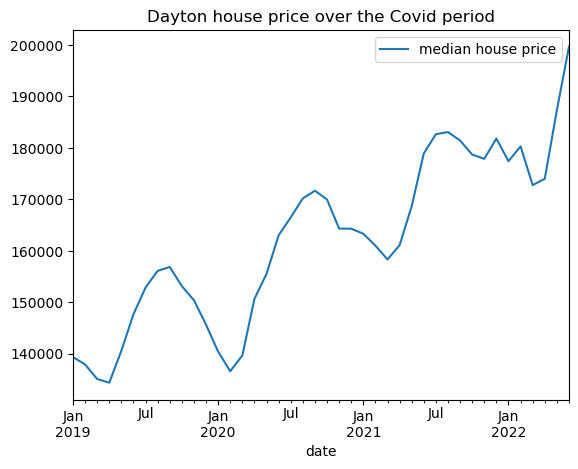

In [70]:
dayton_covidtime.plot(kind='line', x='date', y='value', title='Dayton house price over the Covid period', label='median house price')

In [110]:
dayton_b4covid = dayton[(dayton['date'] >= '1-1-2014') & (dayton['date']<='31-12-2018')]
dayton_b4covid.head()

,indicator_id,region_id,date,value,region_type,region,City,State
644,SSSM,845158,2018-12-31,137950.0,metro,"Dayton, OH",Dayton,OH
645,SSSM,845158,2018-11-30,137983.0,metro,"Dayton, OH",Dayton,OH
646,SSSM,845158,2018-10-31,141667.0,metro,"Dayton, OH",Dayton,OH
647,SSSM,845158,2018-09-30,142000.0,metro,"Dayton, OH",Dayton,OH
648,SSSM,845158,2018-08-31,147667.0,metro,"Dayton, OH",Dayton,OH


In [109]:
dayton_b4covid = dayton_b4covid[dayton_b4covid['region_id']==394521]
# creating a new column to identify if the date is before or during covid
dayton_b4covid['covid'] = "before"
dayton_b4covid.head()

,indicator_id,region_id,date,value,region_type,region,City,State,month,covid
69994,SSSM,394521,2018-12-31,144288.0,metro,"Dayton, OH",Dayton,OH,201812,before
69995,SSSM,394521,2018-11-30,144313.0,metro,"Dayton, OH",Dayton,OH,201811,before
69996,SSSM,394521,2018-10-31,148038.0,metro,"Dayton, OH",Dayton,OH,201810,before
69997,SSSM,394521,2018-09-30,150900.0,metro,"Dayton, OH",Dayton,OH,201809,before
69998,SSSM,394521,2018-08-31,151113.0,metro,"Dayton, OH",Dayton,OH,201808,before


<Axes: title={'center': 'Dayton house prices before covid'}, xlabel='date'>

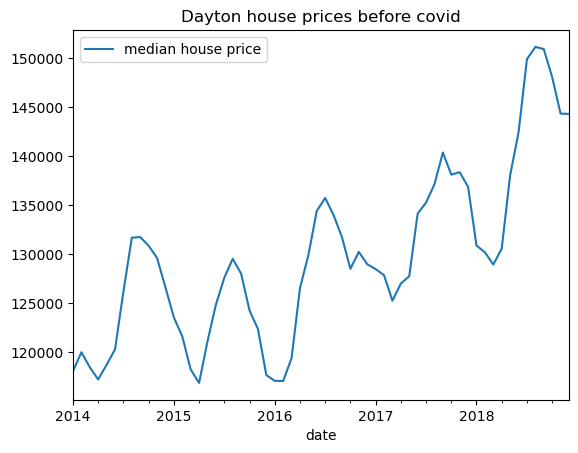

In [78]:
dayton_b4covid.plot(kind='line', x='date', y='value', title='Dayton house prices before covid', label='median house price')

In [108]:
# plot the before and after covid dayton side by side
# concat the data vertically.
dayton_b4_during_covid= pd.concat([dayton_b4covid[['date','value','covid']], dayton_covidtime[['date','value','covid']]],axis=0)
dayton_b4_during_covid

,date,value,covid
69994,2018-12-31,144288.0,before
69995,2018-11-30,144313.0,before
69996,2018-10-31,148038.0,before
69997,2018-09-30,150900.0,before
69998,2018-08-31,151113.0,before
...,...,...,...
69956,2022-02-28,180300.0,during
69955,2022-03-31,172750.0,during
69954,2022-04-30,174000.0,during
69953,2022-05-31,187333.0,during


D:\Programs\Anaconda\envs\dev\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


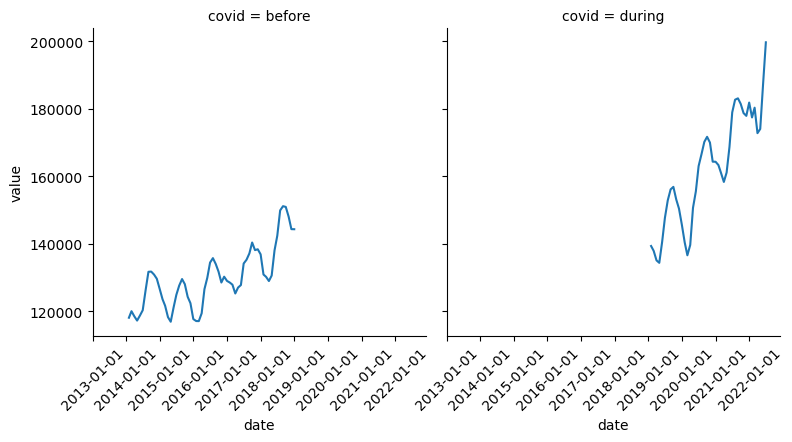

In [104]:
# plotting before and during covid side by side
g = sns.FacetGrid(dayton_b4_during_covid, col='covid', col_wrap=2, height=4)
g.map(sns.lineplot, "date", 'value')
g.set_xticklabels(rotation=45)
plt.show()

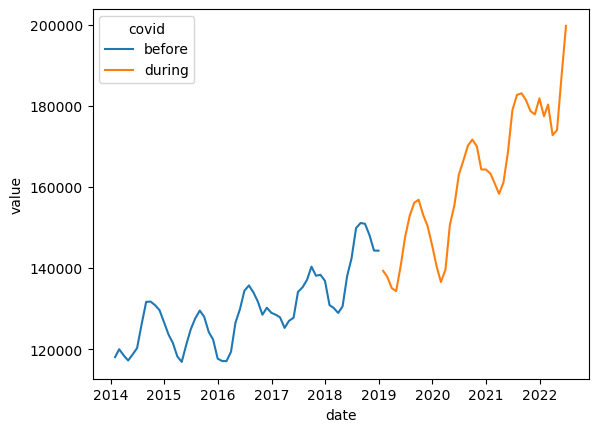

In [107]:
# using seaborn to plot a line graph with different colors for before and during covid.
sns.lineplot(data = dayton_b4_during_covid, x='date', y='value', hue='covid')
plt.legend(title='covid')
plt.show()

Analysis of house prices before and during covid  
  - It appears that although the pandemic does not affect the cycle of the house price much (still around 1 year), it does amaplify the magnitude of the cycle (there is a bigger difference between the trough and crest of the cycle).  
  - It also appears during covid the price seems less stable as there is more volatility as seen from multiple mini-cycles towards the beginning of 2022.

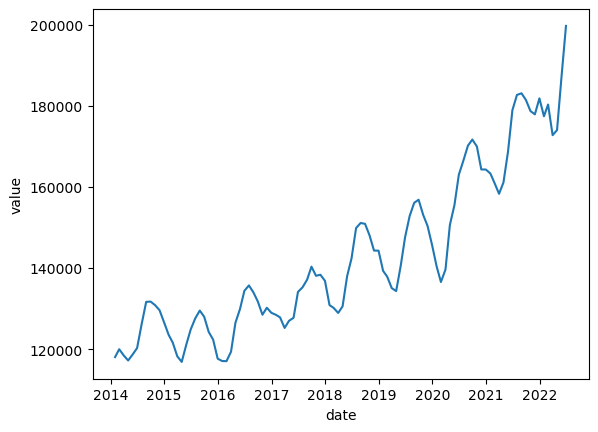

In [113]:
sns.lineplot(data = dayton_b4_during_covid, x='date', y='value')
plt.show()

In [3]:
# Census-Bureau designated four regions, most commonly used for data collection
# Source: https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States

# Northeast Region = 9 States
region_northeast = ('CT', 'MA', 'ME', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT')

# Midwest Region = 12 States
region_midwest = ('IA', 'IL', 'IN', 'KS', 'MI', 'MN', 'MO', 'ND', 'NE', 'OH', 'SD', 'WI')

# South Region = 18 States (including Washington,DC (DC) and New Mexico)
region_south = ('AL', 'AR', 'DC', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA','NM', 'WV')

# West Region = 12 States
region_west = ( 'AZ', 'CO', 'ID', 'MT','NV','UT', 'WY','AK','CA', 'HI', 'OR', 'WA')
print(f"northeast: {len(region_northeast)}, midwest: {len(region_midwest)}, south: {len(region_south)}, west: {len(region_west)}")

northeast: 9, midwest: 12, south: 18, west: 12


In [4]:
sssm_subset = sssm_combine.sample(10000)
sssm_subset

NameError: name 'sssm_combine' is not defined